<a href="https://colab.research.google.com/github/rmendesl/TCC/blob/master/04_CreateModelScikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando o Modelo - Supervisionado

Primeiramente, devemos distinguir 4 tipos de tarefas de aprendizagem de máquina:
* Aprendizagem supervisionada;
* Aprendizagem não-supervisionada;
* Aprendizagem semi-supervisionada;
* Aprendizagem por reforço;

Nosso modelo será o supervisionado, aprendizagem supervisionada é a tarefa de encontrar uma função a partir de dados de treinamento rotulados. O objetivo é encontrar os parâmetros ótimos que ajustem um modelo que possa prever rótulos desconhecidos em outros objetos (o conjunto de teste). Se o rótulo é um número real, a tarefa chama-se regressão. Se o rótulo vem de um conjunto finito e não ordenado, então a tarefa chama-se classificação, essa última será a nossa tarefa.

A classificação binária é uma técnica supervisionada de aprendizado de máquina, na qual o objetivo é prever rótulos de classe categóricos que sejam discretos e não monitorados, como Aprovado/Reprovado, Positivo/Negativo, Padrão/Não Padrão etc. Alguns casos de uso do mundo real para classificação estão listados abaixo : 
* Exames médicos para determinar se um paciente tem uma determinada doença ou não - a propriedade de classificação é a presença da doença. 
* Um método de teste "aprovado ou reprovado" ou controle de qualidade nas fábricas, ou seja, decidir se uma especificação foi ou não atendida - uma classificação de aprovação / não aprovação. 
* Recuperação de informações, ou seja, decidir se uma página ou um artigo deve estar no conjunto de resultados de uma pesquisa ou não - a propriedade de classificação é a relevância do artigo ou a utilidade para o usuário.

Não iremos entrar nos detalhes dos demais tipos de aprendizagem, porém, segue abaixo algumas fontes para consulta.


Fonte: https://medium.com/machina-sapiens/algoritmos-de-aprendizagem-de-m%C3%A1quina-qual-deles-escolher-67040ad68737

Fonte: https://medium.com/@categitau/in-one-of-my-previous-posts-i-introduced-machine-learning-and-talked-about-the-two-most-common-c1ac6e18df16

## Scikit-learn

A [Scikit-learn](https://scikit-learn.org/stable/index.html) é a mais popular biblioteca de aprendizado de máquina de código aberto que suporta aprendizado supervisionado e não supervisionado. Ele também fornece várias ferramentas para ajuste de modelo, pré-processamento de dados, seleção e avaliação de modelo e muitos outros utilitários.

Este projeto foi iniciado em 2007 como um projeto do Google Summer of Code por David Cournapeau. Mais tarde naquele ano, Matthieu Brucher começou a trabalhar nesse projeto como parte de sua tese. Em 2010, Fabian Pedregosa, Gael Varoquaux, Alexandre Gramfort e Vincent Michel do INRIA assumiram a liderança do projeto e fizeram o primeiro lançamento público, 1º de fevereiro de 2010. Desde então, vários lançamentos apareceram após um ciclo de 3 meses e uma próspero comunidade internacional tem liderado o desenvolvimento.

O processo de tomada de decisão e a estrutura de governança do scikit-learn são apresentados no [documento de governança.](https://scikit-learn.org/stable/governance.html#governance)

GitHub: https://github.com/scikit-learn

## Bibliotecas utilizadas

Referência para a bibioteca Pandas: https://pandas.pydata.org/docs/user_guide/index.html

Referência para a biblioteca Numpy: https://numpy.org/doc/

Referência para a biblioteca Seaborn: https://seaborn.pydata.org/tutorial.html

Referência para a biblioteca Matplotlib: https://matplotlib.org/index.html

In [1]:
# Importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Configurando o tamanho da figura
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8, 6)

## Carregando os dados

### Montando o Drive do Google Drive

In [ ]:
# Execute apenas se desejar fazer o upload do arquivo local para o seu Google Drive
from google.colab import files
files.upload()

In [3]:
# Montando o drive do seu Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Carregando o arquivo para o dataframe

Use apenas uma das duas opções abaixo:

1.   Carregando direto do seu Google Drive;
2.   Carregando direto do link compartilhado;

Os dados para o modelo foram salvos em um arquivo CSV durante a etapa anterior.

* `base_model.csv`

In [4]:
# Troque o caminho root_path caso seu arquivo esteja em outra pasta em seu drive
root_path = 'drive/My Drive/TCC/'
data = 'base_model.csv'



---


1. Carregando direto do seu Google Drive

In [ ]:
# Carregando os dados do arquivo CSV para o dataframe
df_renovacao = pd.read_csv(root_path + data, sep='|')



---


2. Carregando direto do link compartilhado

In [5]:
# Use o link abaixo para ter acesso direto ao arquivo
link = "https://drive.google.com/uc?export=download&id=1uUHyv-ieXXNbS2SQ4n2Oj_E5N-NeVWHd"

# Carregando os dados do arquivo CSV para o dataframe
df_renovacao = pd.read_csv(link, sep='|')



---



In [6]:
# Lendo os primeiros e últimos registros do dataframe
df_renovacao

,COD_MATRICULA,REMATRICULADO,TIPO_INADIMPLENCIA,RISCO_INADIMPLENCIA,CLASSE_PAGANTE_ANT,CLASSE_PAGANTE_ATU,NOVO_FIES,PRV_ANT,PRV_ATU,LATE_COMER,NOM_SITUACAO_ALUNO,VAL_A_PAGAR,VAL_A_PAGAR_PAR,VAL_DIVIDA_MENS,VAL_DIVIDA_TOTAL,FAIXA_DE_DIVIDA,ADIMP_N_REN,CR_PER_ANT,FAIXA_APROVACAO,QTD_ACESSOS_19_2,QTD_ACESSOS_20_1,IND_INDICIO_EVASAO,CLASSIFICACAO_PROP_EVASAO,CLASSIFICACAO_PROP_RENOVACAO,ACEITE_CONTRATO,REQ_AGEND_TRANC,SAFRA
0,200701339023,0,ADIMPLENTE,SEM RISCO,MENSALISTA,MENSALISTA,NÃO,0,0,ON TIME COMER,Ativo,51.18,0.00,0.00,0.00,SEM DIVIDA,1,9.00,7 - 100%,32.0,21.0,0,1 - Alto,3 - Médio Baixo,0,0,VETERANO
1,200702198245,0,INADIMPLENTE SEM NEGOCIACAO,MEDIO RISCO,MENSALISTA,MENSALISTA,NÃO,0,0,ON TIME COMER,Ativo,0.00,0.00,3111.20,3111.20,> 1500,0,5.91,4 - 41% A 60%,48.0,48.0,0,3 - Médio Baixo,4 - Baixo,1,0,CALOURO
2,200702198679,0,INADIMPLENTE SEM NEGOCIACAO,MEDIO RISCO,MENSALISTA,MENSALISTA,NÃO,0,0,ON TIME COMER,Ativo,0.00,0.00,3238.77,3238.77,> 1500,0,5.27,3 - 21% A 40%,53.0,46.0,0,4 - Baixo,4 - Baixo,0,0,VETERANO
3,200801431011,1,ADIMPLENTE,SEM RISCO,MENSALISTA,MENSALISTA,NÃO,0,0,ON TIME COMER,Ativo,2521.12,0.00,0.00,0.00,SEM DIVIDA,0,9.89,7 - 100%,130.0,119.0,0,4 - Baixo,2 - Médio Alto,1,0,VETERANO
4,200901402225,1,ADIMPLENTE,BAIXO RISCO,MENSALISTA,MENSALISTA,NÃO,0,0,ON TIME COMER,Ativo,170.96,0.00,0.00,0.00,SEM DIVIDA,0,3.50,4 - 41% A 60%,125.0,70.0,0,00 - Não Escorado,00 - Não Escorado,1,0,VETERANO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,201912030837,1,ADIMPLENTE,BAIXO RISCO,MENSALISTA,MENSALISTA,NÃO,0,0,ON TIME COMER,Ativo,534.38,0.00,0.00,0.00,SEM DIVIDA,0,7.54,7 - 100%,143.0,133.0,0,4 - Baixo,3 - Médio Baixo,1,0,VETERANO
2139,201912030853,1,ADIMPLENTE,BAIXO RISCO,PAR,PAR,NÃO,0,0,ON TIME COMER,Ativo,1157.48,5.16,0.00,5.16,SEM DIVIDA,0,6.31,5 - 61% A 80%,64.0,42.0,0,2 - Médio Alto,3 - Médio Baixo,1,0,VETERANO
2140,201912030861,0,ADIMPLENTE,MEDIO RISCO,PAR,PAR,NÃO,0,0,ON TIME COMER,Trancado,0.00,4.88,0.00,0.00,SEM DIVIDA,0,7.43,7 - 100%,154.0,109.0,1,3 - Médio Baixo,3 - Médio Baixo,1,0,VETERANO
2141,201912030934,1,INADIMPLENTE COM NEGOCIACAO,BAIXO RISCO,PAR,PAR,NÃO,0,0,ON TIME COMER,Ativo,1486.82,606.04,0.00,489.79,SEM DIVIDA,0,6.14,7 - 100%,154.0,147.0,0,4 - Baixo,3 - Médio Baixo,1,0,VETERANO


## Modelo de Classificação

Referência: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

### Transformar as variáveis categóricas em numéricas para o modelo

Nos projetos de machine learning, uma parte importante é a engenharia de features. É muito comum ver recursos categóricos em um conjunto de dados. No entanto, nosso algoritmo de aprendizado de máquina pode apenas ler valores numéricos. É essencial codificar recursos categóricos em valores numéricos. Para isso iremos usar um método de [Category Encoders](http://contrib.scikit-learn.org/category_encoders/).

Essas são apenas algumas das maneiras diferentes de codificar recursos categóricos: 

1. LabelEncoder e OneHotEncoder 
2. OrdinalEncoder
3. TargetEncoder
4. DictVectorizer 
5. Pandas *get_dummies*

Avaliaremos o **OneHotEncoder** em nosso projeto.

O Category Encoders pode já vir instalado no Goggle Colab, porém iremos realizar a instalação com o parâmetro -U. Dessa forma, caso tenha alguma atualização, ela já será aplicada.

`!pip install -U category_encoders`

Caso o pacote não esteja instalado, execute o comando abaixo primeiro:

`!pip install category_encoders`

In [8]:
!pip install -U category_encoders

     |████████████████████████████████| 81kB 2.2MB/s 


#### OneHotEncoder

O OneHotEncoder é mais fácil de entender conceitualmente. Esse tipo de codificação simplesmente transforma cada valor categórico em uma nova coluna no dataset, o preenche essa nova coluna com um valor binário.

Referência: http://contrib.scikit-learn.org/category_encoders/onehot.html

In [9]:
# Importando o pacote necessário
from category_encoders.one_hot import OneHotEncoder

In [10]:
# Primeiro precisamos extrair as variáveis categoricas 
col_categoricas = list(df_renovacao.select_dtypes(include=['object']).columns)

# Inicializando OneHotEncoder
ohe = OneHotEncoder(cols=col_categoricas, use_cat_names=True) 

# Aplicando o OneHotEncoder nas colunas de variáveis categóricas
df_renovacao_ohe = ohe.fit_transform(df_renovacao)
df_renovacao_ohe

,COD_MATRICULA,REMATRICULADO,TIPO_INADIMPLENCIA_ADIMPLENTE,TIPO_INADIMPLENCIA_INADIMPLENTE SEM NEGOCIACAO,TIPO_INADIMPLENCIA_INADIMPLENTE COM NEGOCIACAO,RISCO_INADIMPLENCIA_SEM RISCO,RISCO_INADIMPLENCIA_MEDIO RISCO,RISCO_INADIMPLENCIA_BAIXO RISCO,RISCO_INADIMPLENCIA_ALTO RISCO,CLASSE_PAGANTE_ANT_MENSALISTA,CLASSE_PAGANTE_ANT_PROUNI,CLASSE_PAGANTE_ANT_FIES,CLASSE_PAGANTE_ANT_PAR,CLASSE_PAGANTE_ATU_MENSALISTA,CLASSE_PAGANTE_ATU_PROUNI,CLASSE_PAGANTE_ATU_FIES,CLASSE_PAGANTE_ATU_PAR,NOVO_FIES_NÃO,NOVO_FIES_SIM,PRV_ANT,PRV_ATU,LATE_COMER_ON TIME COMER,LATE_COMER_LATE COMER,NOM_SITUACAO_ALUNO_Ativo,NOM_SITUACAO_ALUNO_Trancado,NOM_SITUACAO_ALUNO_Transferido,VAL_A_PAGAR,VAL_A_PAGAR_PAR,VAL_DIVIDA_MENS,VAL_DIVIDA_TOTAL,FAIXA_DE_DIVIDA_SEM DIVIDA,FAIXA_DE_DIVIDA_> 1500,FAIXA_DE_DIVIDA_1000-1500,FAIXA_DE_DIVIDA_300-500,FAIXA_DE_DIVIDA_100-300,FAIXA_DE_DIVIDA_750-1000,FAIXA_DE_DIVIDA_500-750,ADIMP_N_REN,CR_PER_ANT,FAIXA_APROVACAO_7 - 100%,FAIXA_APROVACAO_4 - 41% A 60%,FAIXA_APROVACAO_3 - 21% A 40%,FAIXA_APROVACAO_5 - 61% A 80%,FAIXA_APROVACAO_1 - 0%,FAIXA_APROVACAO_6 - 81% A 99%,FAIXA_APROVACAO_2 - 1% A 20%,QTD_ACESSOS_19_2,QTD_ACESSOS_20_1,IND_INDICIO_EVASAO,CLASSIFICACAO_PROP_EVASAO_1 - Alto,CLASSIFICACAO_PROP_EVASAO_3 - Médio Baixo,CLASSIFICACAO_PROP_EVASAO_4 - Baixo,CLASSIFICACAO_PROP_EVASAO_00 - Não Escorado,CLASSIFICACAO_PROP_EVASAO_2 - Médio Alto,CLASSIFICACAO_PROP_RENOVACAO_3 - Médio Baixo,CLASSIFICACAO_PROP_RENOVACAO_4 - Baixo,CLASSIFICACAO_PROP_RENOVACAO_2 - Médio Alto,CLASSIFICACAO_PROP_RENOVACAO_00 - Não Escorado,CLASSIFICACAO_PROP_RENOVACAO_1 - Alto,ACEITE_CONTRATO,REQ_AGEND_TRANC,SAFRA_VETERANO,SAFRA_CALOURO
0,200701339023,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,51.18,0.00,0.00,0.00,1,0,0,0,0,0,0,1,9.00,1,0,0,0,0,0,0,32.0,21.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,200702198245,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0.00,0.00,3111.20,3111.20,0,1,0,0,0,0,0,0,5.91,0,1,0,0,0,0,0,48.0,48.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
2,200702198679,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0.00,0.00,3238.77,3238.77,0,1,0,0,0,0,0,0,5.27,0,0,1,0,0,0,0,53.0,46.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,200801431011,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,2521.12,0.00,0.00,0.00,1,0,0,0,0,0,0,0,9.89,1,0,0,0,0,0,0,130.0,119.0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0
4,200901402225,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,170.96,0.00,0.00,0.00,1,0,0,0,0,0,0,0,3.50,0,1,0,0,0,0,0,125.0,70.0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,201912030837,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,534.38,0.00,0.00,0.00,1,0,0,0,0,0,0,0,7.54,1,0,0,0,0,0,0,143.0,133.0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
2139,201912030853,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1157.48,5.16,0.00,5.16,1,0,0,0,0,0,0,0,6.31,0,0,0,1,0,0,0,64.0,42.0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0
2140,201912030861,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0.00,4.88,0.00,0.00,1,0,0,0,0,0,0,0,7.43,1,0,0,0,0,0,0,154.0,109.0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0
2141,201912030934,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1486.82,606.04,0.00,489.79,1,0,0,0,0,0,0,0,6.14,1,0,0,0,0,0,0,154.0,147.0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0


### Separando os dados em X e y

Separando a variável alvo das demais features.

* **Variável independente**: É a medida do lado não dependente de nenhuma outra medida variável. Variável X.
* **Variável dependente**: É uma medida que dependerá do valor de outra medida variável. Variável y.

In [11]:
# Separando o conjunto de dados criado pelo método OneHotEncoder
X_ohe = df_renovacao_ohe.drop(['COD_MATRICULA', 'REMATRICULADO'], axis=1)
y_ohe = df_renovacao_ohe['REMATRICULADO']

### Dividindo nosso conjunto de dados em treinamento e teste

Normalmente, quando você separa um conjunto de dados em um conjunto de treinamento e um conjunto de teste, a maioria dos dados é usada para treinamento e uma parte menor dos dados é usada para teste do modelo.


Referência: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [12]:
# Importando o pacote necessários
from sklearn.model_selection import train_test_split

In [13]:
# Dividindo o conjunto de dados criado pelo método OneHotEncoder
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_ohe, y_ohe, train_size = 0.7, random_state = 1234)

### Criando o modelo preliminar

Referência para a biblioteca de Métricas: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

Referência para a biblioteca Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [17]:
# Importando pacotes necessários
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, cohen_kappa_score, matthews_corrcoef, confusion_matrix, classification_report, roc_curve
from sklearn.ensemble import RandomForestClassifier

#### Modelo preliminar usando o método **OneHotEncoder** como encoder para as variáveis categóricas

In [18]:
# Código para a criação do modelo premilinar usando o OneHotEncoder como encoder para as variáveis categóricas

mdl = RandomForestClassifier(n_estimators=100, random_state=1234, n_jobs=-1)
mdl.fit(X_train_ohe, y_train_ohe)

p = mdl.predict(X_test_ohe)
y_proba = mdl.predict_proba(X_test_ohe)[:, 1]
 
acc = accuracy_score(y_test_ohe, p)
auc = roc_auc_score(y_test_ohe, y_proba)
recall = recall_score(y_test_ohe, p)
precision = precision_score(y_test_ohe, p)
f1 = f1_score(y_test_ohe, p)

mdl

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

In [ ]:
# Resultado do modelo preliminar
cols   = ['Model', 'Accuracy', 'AUC', 'Recall', 'Prec.', 'F1', 'Encoder']
values = ['Random Forest Classifier', acc, auc, recall, precision, f1, 'OneHotEncoder']
metrics_pre_ohe = pd.DataFrame({tup[0]: [tup[1]] for tup in zip(cols, values)})
metrics_pre_ohe

,Model,Accuracy,AUC,Recall,Prec.,F1,Encoder
0,Random Forest Classifier,0.92535,0.932865,0.96,0.949153,0.954545,OneHotEncoder


### Tunando nosso modelo preliminar

Primeiro você deve tunar os hiper parâmatros antes da etapa de features selection, pois caso contrário, você pode estar reduzindo as features que, se o seu modelo tivesse outros parâmetros ele conseguiria extrair valor delas.

* Primeiro, tune os hiper parâmetros;
* Segundo, faça a seleção de features;

Por exemplo:

*Imagine que você tenha 100 features, se você reduzir com os hiper parâmetros padrões, pode ser que ele elimine 50 features que se tivesse tunado antes ele somente eliminaria 30, e conseguiria tirar mais valor delas.*

Iremos usar 02(dois) métodos para encontrar os melhores hiper parâmetros para nosso modelo:

* Random Search;
* Bayesian Optimization;

Referência: https://scikit-optimize.github.io/stable/

In [ ]:
# Instalando o pacote necessário
!pip install scikit-optimize

#### Random Search - *Busca Aleatória*

Vamos tentar encontar e ajustar os melhores hiper parâmetros para nosso modelo usando o método de busca aleatória.

Referência: https://scikit-optimize.github.io/stable/modules/generated/skopt.dummy_minimize.html

`dummy_minimize` - Pesquisa aleatória por amostragem uniforme dentro dos limites informados.


In [ ]:
# Importando o pacote necessário
from skopt import dummy_minimize

In [ ]:
# Para ver os parâmetros utilizados em uma RandomForestClassifier, descomente o código abaixo
#?RandomForestClassifier

##### Tunando o modelo preliminar usando o método **OneHotEncoder** como encoder para as variáveis categóricas

In [ ]:
# Função para encontrar os melhores hiper parâmetros para esse modelo
def tunar_modelo_ohe(params):
    n_estimators = params[0]
    max_depth = params[1]
    min_samples_leaf = params[2]
    min_samples_split = params[3]
    bootstrap = params[4]
    max_features = params[5]
    
    print(params, '\n')
   
    mdl = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split,
                                 max_features = max_features,  bootstrap = bootstrap, random_state = 1234, n_jobs = -1)
    mdl.fit(X_train_ohe, y_train_ohe)

    p = mdl.predict(X_test_ohe)
    y_proba = mdl.predict_proba(X_test_ohe)[:, 1]
     
    return -roc_auc_score(y_test_ohe, y_proba)

space = [(70, 150),                # n_estimators
         (90, 200),                # max_depth
         (1, 5),                   # min_samples_leaf
         (2, 10),                  # min_samples_split
         (True, False),            # bootstrap 
         ('auto', 'sqrt', 'log2')] # max_features

resultado_rs_ohe = dummy_minimize(tunar_modelo_ohe, space, random_state=3, verbose=1, n_calls=30)

Iteration No: 1 started. Evaluating function at random point.
[94, 93, 1, 10, False, 'log2'] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.4566
Function value obtained: -0.9353
Current minimum: -0.9353
Iteration No: 2 started. Evaluating function at random point.
[144, 197, 2, 7, True, 'sqrt'] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.6661
Function value obtained: -0.9326
Current minimum: -0.9353
Iteration No: 3 started. Evaluating function at random point.
[114, 183, 1, 3, True, 'sqrt'] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.5565
Function value obtained: -0.9333
Current minimum: -0.9353
Iteration No: 4 started. Evaluating function at random point.
[133, 150, 2, 5, False, 'sqrt'] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.5628
Function value obtained: -0.9361
Current minimum: -0.9361
Iteration No: 5 started. Evaluating function at random point.
[99, 196, 1, 9, True, 'sq

In [ ]:
resultado_rs_ohe.x

[150, 122, 1, 4, True, 'auto']

Resultado = AUC 0.9391

Parâmetros = [150, 122, 1, 4, True, 'auto']

In [ ]:
n_estimators, max_depth, min_samples_leaf, min_samples_split, bootstrap, max_features = resultado_rs_ohe.x

In [ ]:
# Resultado final do modelo tunado por Random Search
auc =  0.9391

cols   = ['TunningSelector', 'AUC', 'n_estimators', 'max_depth', 'min_samples_leaf', 'min_samples_split', 'bootstrap', 'max_features', 'encoder']
values = ['Random Search', auc, n_estimators, max_depth, min_samples_leaf, min_samples_split, bootstrap, max_features, 'OneHotEncoder']
metrics_rs_ohe = pd.DataFrame({tup[0]: [tup[1]] for tup in zip(cols, values)})
metrics_rs_ohe

,TunningSelector,AUC,n_estimators,max_depth,min_samples_leaf,min_samples_split,bootstrap,max_features,encoder
0,Random Search,0.9391,150,122,1,4,True,auto,OneHotEncoder


#### Bayesian Optimization - *Otimização Bayesiana*

A Otimização Bayesiana é uma abordagem que utiliza o Teorema de Bayes para direcionar a busca a fim de encontrar o mínimo ou máximo de uma função objetivo.

Referência: https://scikit-optimize.github.io/stable/auto_examples/bayesian-optimization.html

`gp_minimize` - Otimização Bayesiana usando Processos Gaussianos.



https://scikit-optimize.github.io/stable/modules/generated/skopt.gp_minimize.html

In [ ]:
# Importando o pacote necessário
from skopt import gp_minimize

##### Tunando o modelo preliminar usando o método **OneHotEncoder** como encoder para as variáveis categóricas

In [ ]:
resultado_gp_ohe = gp_minimize(tunar_modelo_ohe, space, random_state=3, verbose=1, n_calls=30, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[76, 182, 1, 7, True, 'auto'] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.4507
Function value obtained: -0.9361
Current minimum: -0.9361
Iteration No: 2 started. Evaluating function at random point.
[73, 117, 1, 8, True, 'sqrt'] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.4414
Function value obtained: -0.9338
Current minimum: -0.9361
Iteration No: 3 started. Evaluating function at random point.
[87, 129, 3, 9, False, 'log2'] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.4463
Function value obtained: -0.9304
Current minimum: -0.9361
Iteration No: 4 started. Evaluating function at random point.
[102, 151, 2, 7, True, 'sqrt'] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.5524
Function value obtained: -0.9290
Current minimum: -0.9361
Iteration No: 5 started. Evaluating function at random point.
[131, 180, 2, 9, False, 'aut

In [ ]:
resultado_gp_ohe.x

[72, 198, 1, 9, False, 'sqrt']

Resultado = AUC 0.9412

Parâmetros = [72, 198, 1, 9, False, 'sqrt']


In [ ]:
n_estimators, max_depth, min_samples_leaf, min_samples_split, bootstrap, max_features = resultado_gp_ohe.x

In [ ]:
# Resultado final do modelo tunado por Bayesian Optimization
auc = 0.9412

cols   = ['TunningSelector', 'AUC', 'n_estimators', 'max_depth', 'min_samples_leaf', 'min_samples_split', 'bootstrap', 'max_features', 'encoder']
values = ['Bayesian Optimization', auc, n_estimators, max_depth, min_samples_leaf, min_samples_split, bootstrap, max_features, 'OneHotEncoder' ]
metrics_bo_ohe = pd.DataFrame({tup[0]: [tup[1]] for tup in zip(cols, values)})
metrics_bo_ohe

,TunningSelector,AUC,n_estimators,max_depth,min_samples_leaf,min_samples_split,bootstrap,max_features,encoder
0,Bayesian Optimization,0.9412,72,198,1,9,False,sqrt,OneHotEncoder


In [ ]:
# Importanto pacote necessário
from skopt.plots import plot_convergence

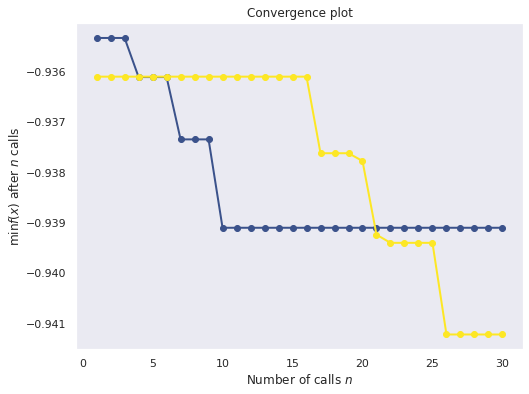

In [ ]:
plot_convergence(resultado_rs_ohe, resultado_gp_ohe);


### Comparando os resultados do nosso modelo preliminar com os modelos tunados (*Busca Aleatória e Otimização Bayesiana*)

In [ ]:
# Modelo preliminar
metrics_pre_ohe.sort_values(['AUC','Accuracy'],ascending=False).head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Encoder
0,Random Forest Classifier,0.92535,0.932865,0.96,0.949153,0.954545,OneHotEncoder


In [ ]:
# Código para agregar os dataframes Random Search e Bayesian Optimization
df_tunning = pd.concat([metrics_rs_ohe, metrics_bo_ohe], axis=0)
df_tunning.sort_values(['AUC','n_estimators'],ascending=False).head()

,TunningSelector,AUC,n_estimators,max_depth,min_samples_leaf,min_samples_split,bootstrap,max_features,encoder
0,Bayesian Optimization,0.9412,72,198,1,9,False,sqrt,OneHotEncoder
0,Random Search,0.9391,150,122,1,4,True,auto,OneHotEncoder


 Melhor resultado do Tunning foi:

* Método de Tunning = **Bayesian Optimization**
 * AUC = *0.9412*
 * n_estimators = *72*
 * max_depth = *198*
 * min_samples_leaf = *1*	
 * min_samples_split =	*9*
 * bootstrap = *False*
 * max_features = *sqrt*
 * encoder = *OneHotEncoder*


### Selecionado as melhores features para o modelo

Vamos selecionar as melhores features utilizando esses dois métodos:

* SelectFromModel
* SelectKBest

A seleção de features é o processo de redução do número de variáveis ​​de entrada ao desenvolver um modelo preditivo. 

É desejável reduzir o número de variáveis ​​de entrada para reduzir o custo computacional da modelagem e, em alguns casos, melhorar o desempenho do modelo. 

Os métodos de seleção de recurso baseados em estatística envolvem a avaliação do relacionamento entre cada variável de entrada e a variável de destino usando estatísticas e a seleção das variáveis ​​de entrada que têm o relacionamento mais forte com a variável de destino. Esses métodos podem ser rápidos e eficazes, embora a escolha de medidas estatísticas dependa do tipo de dados das variáveis ​​de entrada e saída.

Referência para a biblioteca Feature Selection: https://scikit-learn.org/stable/modules/feature_selection.html

Referência para a biblioteca Logistic Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [15]:
# Importando pacotes necessários
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.linear_model import LogisticRegression

#### Conjunto de dados transformado com o **OneHotEncoder**

* Método de Tunning = **Bayesian Optimization**
 * AUC = *0.9412*
 * n_estimators = *72*
 * max_depth = *198*
 * min_samples_leaf = *1*	
 * min_samples_split =	*9*
 * bootstrap = *False*
 * max_features = *sqrt*
 * encoder = *OneHotEncoder*

##### SelectFromModel

Meta-transformador para selecionar features com base na importância dos pesos.

Referência: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

In [ ]:
# Esse código faz a seleção das melhores features usando uma RandomForestClassifier, e usando o RandomForestClassifier para predição 
k_vs_acc = []
k_vs_auc = []
k_vs_recall = []
k_vs_precision = []
k_vs_f1 = []
features_list = []
k_numbers = []
encoder = []
seletor = []

for k in range(2, X_train_ohe.shape[1], 2):
  selector_model = RandomForestClassifier(random_state=123, n_jobs=-1) 
  selector = SelectFromModel(selector_model, max_features=k, threshold=-np.inf)

  selector.fit(X_train_ohe, y_train_ohe)

  X_train2 = selector.transform(X_train_ohe)
  X_test2 = selector.transform(X_test_ohe)

  #print(X_train_ohe.shape, X_train2.shape)

  mdl = RandomForestClassifier(n_estimators=72, max_depth=198, min_samples_leaf=1, min_samples_split=9, bootstrap=False, max_features = 'sqrt', random_state=1234, n_jobs=-1)
  mdl.fit(X_train2, y_train_ohe)

  p = mdl.predict(X_test2)
  y_proba = mdl.predict_proba(X_test2)[:, 1]
 
  acc = accuracy_score(y_test_ohe, p)
  auc = roc_auc_score(y_test_ohe, y_proba)
  recall = recall_score(y_test_ohe, p)
  precision = precision_score(y_test_ohe, p)
  f1 = f1_score(y_test_ohe, p)

  print("k = {} - AUC = {}".format(k, auc))

  mask = selector.get_support()
  features = list(X_train_ohe.columns[mask])
  #print(features)

  k_vs_acc.append(acc)
  k_vs_auc.append(auc)
  k_vs_recall.append(recall)
  k_vs_precision.append(precision)
  k_vs_f1.append(f1)
  features_list.append(features)
  k_numbers.append(X_train2.shape[1])
  encoder.append('OneHotEncoder')
  seletor.append('RandomForestClassifier')

k = 2 - AUC = 0.7543179983857949
k = 4 - AUC = 0.7572881355932204
k = 6 - AUC = 0.7952380952380953
k = 8 - AUC = 0.8822518159806296
k = 10 - AUC = 0.8781678773204197
k = 12 - AUC = 0.8984100080710251
k = 14 - AUC = 0.8956174334140437
k = 16 - AUC = 0.9005326876513318
k = 18 - AUC = 0.8951331719128329
k = 20 - AUC = 0.9102582728006456
k = 22 - AUC = 0.9198627925746571
k = 24 - AUC = 0.9239386602098467
k = 26 - AUC = 0.9246973365617434
k = 28 - AUC = 0.9202017756255044
k = 30 - AUC = 0.9249394673123487
k = 32 - AUC = 0.9293301049233254
k = 34 - AUC = 0.936230831315577
k = 36 - AUC = 0.9311138014527844
k = 38 - AUC = 0.9310330912025828
k = 40 - AUC = 0.9298950766747378
k = 42 - AUC = 0.9335108958837772
k = 44 - AUC = 0.928587570621469
k = 46 - AUC = 0.9316384180790961
k = 48 - AUC = 0.93682001614205
k = 50 - AUC = 0.9348426150121065
k = 52 - AUC = 0.9326069410815173
k = 54 - AUC = 0.9341242937853107
k = 56 - AUC = 0.9354802259887005
k = 58 - AUC = 0.9318563357546409
k = 60 - AUC = 0.93715

In [ ]:
# Cria um novo dataframe com o resultado do processo
df1 = pd.DataFrame(list(zip(k_vs_acc, k_vs_auc, k_vs_recall, k_vs_precision, k_vs_f1, features_list,  k_numbers,  encoder, seletor)), columns = ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1-Score', 'Features', 'FeatureNumber', 'Encoder', 'Selector'])
df1.head()

,Accuracy,AUC,Recall,Precision,F1-Score,Features,FeatureNumber,Encoder,Selector
0,0.850700,0.754318,0.940952,0.883721,0.911439,"[VAL_A_PAGAR, FAIXA_DE_DIVIDA_SEM DIVIDA]",2,OneHotEncoder,RandomForestClassifier
1,0.867807,0.757288,0.963810,0.884615,0.922516,"[VAL_A_PAGAR, FAIXA_DE_DIVIDA_SEM DIVIDA, CR_P...",4,OneHotEncoder,RandomForestClassifier
2,0.884914,0.795238,0.954286,0.909256,0.931227,"[VAL_A_PAGAR, VAL_DIVIDA_TOTAL, FAIXA_DE_DIVID...",6,OneHotEncoder,RandomForestClassifier
3,0.926905,0.882252,0.967619,0.944238,0.955786,"[NOM_SITUACAO_ALUNO_Ativo, VAL_A_PAGAR, VAL_DI...",8,OneHotEncoder,RandomForestClassifier
4,0.922240,0.878168,0.961905,0.943925,0.952830,"[NOM_SITUACAO_ALUNO_Ativo, VAL_A_PAGAR, VAL_DI...",10,OneHotEncoder,RandomForestClassifier


In [ ]:
# Esse código faz a seleção das melhores features usando uma LogisticRegression, e usando uma RandomForestClassifier para predição 
k_vs_acc = []
k_vs_auc = []
k_vs_recall = []
k_vs_precision = []
k_vs_f1 = []
features_list = []
k_numbers = []
encoder = []
seletor = []

for k in range(2, X_train_ohe.shape[1], 2):
  selector_model = LogisticRegression(random_state=123, n_jobs=-1)  
  selector = SelectFromModel(selector_model, max_features=k, threshold=-np.inf)

  selector.fit(X_train_ohe, y_train_ohe)

  X_train2 = selector.transform(X_train_ohe)
  X_test2 = selector.transform(X_test_ohe)

  mdl = RandomForestClassifier(n_estimators=72, max_depth=198, min_samples_leaf=1, min_samples_split=9, bootstrap=False, max_features = 'sqrt', random_state=1234, n_jobs=-1)
  mdl.fit(X_train2, y_train_ohe)

  p = mdl.predict(X_test2)
  y_proba = mdl.predict_proba(X_test2)[:, 1]
 
  acc = accuracy_score(y_test_ohe, p)
  auc = roc_auc_score(y_test_ohe, y_proba)
  recall = recall_score(y_test_ohe, p)
  precision = precision_score(y_test_ohe, p)
  f1 = f1_score(y_test_ohe, p)

  print("k = {} - AUC = {}".format(k, auc))

  mask = selector.get_support()
  features = list(X_train_ohe.columns[mask])

  k_vs_acc.append(acc)
  k_vs_auc.append(auc)
  k_vs_recall.append(recall)
  k_vs_precision.append(precision)
  k_vs_f1.append(f1)
  features_list.append(features)
  k_numbers.append(X_train2.shape[1])
  encoder.append('OneHotEncoder')
  seletor.append('LogisticRegression')

k = 2 - AUC = 0.6770540758676352
k = 4 - AUC = 0.8721065375302663
k = 6 - AUC = 0.9390153349475385
k = 8 - AUC = 0.9427360774818403
k = 10 - AUC = 0.9404681194511704
k = 12 - AUC = 0.9366020984665051
k = 14 - AUC = 0.9384342211460857
k = 16 - AUC = 0.9392171105730426
k = 18 - AUC = 0.9392009685230023
k = 20 - AUC = 0.939362389023406
k = 22 - AUC = 0.9413155770782888
k = 24 - AUC = 0.9248103309120259
k = 26 - AUC = 0.932041969330105
k = 28 - AUC = 0.9308716707021792
k = 30 - AUC = 0.9315173527037934
k = 32 - AUC = 0.9349878934624697
k = 34 - AUC = 0.9153510895883777
k = 36 - AUC = 0.9275625504439063
k = 38 - AUC = 0.9209765940274414
k = 40 - AUC = 0.9208716707021791
k = 42 - AUC = 0.9298950766747377
k = 44 - AUC = 0.9285794995964488
k = 46 - AUC = 0.932502017756255
k = 48 - AUC = 0.9273123486682808
k = 50 - AUC = 0.9332203389830509
k = 52 - AUC = 0.9320096852300243
k = 54 - AUC = 0.9347861178369653
k = 56 - AUC = 0.9363115415657788
k = 58 - AUC = 0.9370217917675545
k = 60 - AUC = 0.9366

In [ ]:
# Cria um novo dataframe com o resultado do processo
df2 = pd.DataFrame(list(zip(k_vs_acc, k_vs_auc, k_vs_recall, k_vs_precision, k_vs_f1, features_list,  k_numbers,  encoder, seletor)), columns = ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1-Score', 'Features', 'FeatureNumber', 'Encoder', 'Selector'])
df2.head()

,Accuracy,AUC,Recall,Precision,F1-Score,Features,FeatureNumber,Encoder,Selector
0,0.853810,0.677054,0.956190,0.876091,0.914390,"[ADIMP_N_REN, IND_INDICIO_EVASAO]",2,OneHotEncoder,LogisticRegression
1,0.909798,0.872107,0.950476,0.939736,0.945076,"[CLASSE_PAGANTE_ATU_MENSALISTA, FAIXA_DE_DIVID...",4,OneHotEncoder,LogisticRegression
2,0.928460,0.939015,0.948571,0.963250,0.955854,"[CLASSE_PAGANTE_ATU_MENSALISTA, NOM_SITUACAO_A...",6,OneHotEncoder,LogisticRegression
3,0.933126,0.942736,0.954286,0.963462,0.958852,"[TIPO_INADIMPLENCIA_ADIMPLENTE, CLASSE_PAGANTE...",8,OneHotEncoder,LogisticRegression
4,0.928460,0.940468,0.954286,0.957935,0.956107,"[TIPO_INADIMPLENCIA_ADIMPLENTE, CLASSE_PAGANTE...",10,OneHotEncoder,LogisticRegression


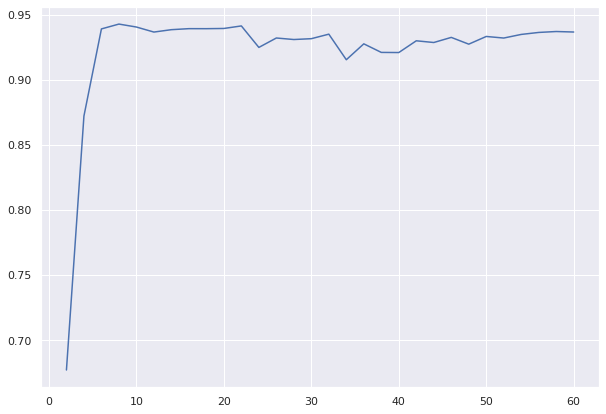

In [ ]:
# Linha mais estável entre 12 e 22 fetures
pd.Series(k_vs_auc, index=range(2,61,2)).plot(figsize=(10,7));

##### SelectKBest

Seleciona as features de acordo com as k pontuações mais altas.

Referência: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Referência: https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

In [ ]:
# Esse código faz a seleção das melhores features usando o SelectKBest, e usando o RandomForestClassifier para predição 
k_vs_acc = []
k_vs_auc = []
k_vs_recall = []
k_vs_precision = []
k_vs_f1 = []
features_list = []
k_numbers = []
encoder = []
seletor = []

for k in range(2,X_train_ohe.shape[1],2):
  selector = SelectKBest(score_func= f_classif, k=k)

  X_train2 = selector.fit_transform(X_train_ohe, y_train_ohe)
  X_test2 = selector.transform(X_test_ohe)

  mdl = RandomForestClassifier(n_estimators=72, max_depth=198, min_samples_leaf=1, min_samples_split=9, bootstrap=False, max_features = 'sqrt', random_state=1234, n_jobs=-1)
  mdl.fit(X_train2, y_train_ohe)

  p = mdl.predict(X_test2)
  y_proba = mdl.predict_proba(X_test2)[:, 1]
 
  acc = accuracy_score(y_test_ohe, p)
  auc = roc_auc_score(y_test_ohe, y_proba)
  recall = recall_score(y_test_ohe, p)
  precision = precision_score(y_test_ohe, p)
  f1 = f1_score(y_test_ohe, p)

  print("k = {} - AUC = {}".format(k, auc))

  mask = selector.get_support()
  features = list(X_train_ohe.columns[mask])

  k_vs_acc.append(acc)
  k_vs_auc.append(auc)
  k_vs_recall.append(recall)
  k_vs_precision.append(precision)
  k_vs_f1.append(f1)
  features_list.append(features)
  k_numbers.append(X_train2.shape[1])
  encoder.append('OneHotEncoder')
  seletor.append('SelectKBest')

k = 2 - AUC = 0.6770863599677159
k = 4 - AUC = 0.7081598062953995
k = 6 - AUC = 0.7033171912832931
k = 8 - AUC = 0.8679418886198548
k = 10 - AUC = 0.8754882970137208
k = 12 - AUC = 0.8650201775625506
k = 14 - AUC = 0.8925181598062955
k = 16 - AUC = 0.8949313962873285
k = 18 - AUC = 0.8983938660209846
k = 20 - AUC = 0.8964164648910412
k = 22 - AUC = 0.8995722356739306
k = 24 - AUC = 0.9065536723163842
k = 26 - AUC = 0.9069330104923327
k = 28 - AUC = 0.9091121872477805
k = 30 - AUC = 0.9063680387409201
k = 32 - AUC = 0.9057223567393059
k = 34 - AUC = 0.9154640839386603
k = 36 - AUC = 0.9237288135593221
k = 38 - AUC = 0.9233817594834545
k = 40 - AUC = 0.926860371267151
k = 42 - AUC = 0.9275221953188055
k = 44 - AUC = 0.9316707021791767
k = 46 - AUC = 0.9311218724778045
k = 48 - AUC = 0.9330508474576271
k = 50 - AUC = 0.9361016949152542
k = 52 - AUC = 0.9351654560129137
k = 54 - AUC = 0.9331557707828894
k = 56 - AUC = 0.9330266343825667
k = 58 - AUC = 0.9345197740112995
k = 60 - AUC = 0.92

In [ ]:
# Cria um novo dataframe com o resultado do processo
df3 = pd.DataFrame(list(zip(k_vs_acc, k_vs_auc, k_vs_recall, k_vs_precision, k_vs_f1, features_list,  k_numbers,  encoder, seletor)), columns = ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1-Score', 'Features', 'FeatureNumber', 'Encoder', 'Selector'])
df3.head()

,Accuracy,AUC,Recall,Precision,F1-Score,Features,FeatureNumber,Encoder,Selector
0,0.875583,0.677086,0.990476,0.873950,0.928571,"[FAIXA_DE_DIVIDA_SEM DIVIDA, FAIXA_DE_DIVIDA_>...",2,OneHotEncoder,SelectKBest
1,0.881804,0.708160,0.979048,0.887737,0.931159,"[TIPO_INADIMPLENCIA_ADIMPLENTE, FAIXA_DE_DIVID...",4,OneHotEncoder,SelectKBest
2,0.864697,0.703317,0.963810,0.881533,0.920837,"[TIPO_INADIMPLENCIA_ADIMPLENTE, VAL_DIVIDA_TOT...",6,OneHotEncoder,SelectKBest
3,0.916019,0.867942,0.956190,0.941839,0.948960,"[TIPO_INADIMPLENCIA_ADIMPLENTE, NOM_SITUACAO_A...",8,OneHotEncoder,SelectKBest
4,0.898911,0.875488,0.933333,0.942308,0.937799,"[TIPO_INADIMPLENCIA_ADIMPLENTE, NOM_SITUACAO_A...",10,OneHotEncoder,SelectKBest


### Juntando todos os DataFrames

Esse DataFrame que criaremos servirá como uma consulta/análise com todos os resultados (métricas) dos dados do testes do modelo, e também os método que utilizamos para isso.

Colunas criadas:

* **Accuracy** - Métrica Acurácia
* **AUC** - Métrica AUC
* **Recall** - Métrica Recall
* **Precision** - Métrica Precisão
* **F1-Score** - Métrica F1-Score
* **Features** - Features mais importantes
* **FeatureNumber** - Número de features usadas
* **Encoder** - Encoder usado para treinamento/teste do modelo (OneHotEncoder)
* **Selector** - Seletor de features usado para treinamento/teste do modelo (SelectFromModel e SelectKBest)

Fizemos uma explicação de cada métrica no notebook anterior com o [PyCaret](https://github.com/rmendesl/TCC/blob/master/03_CreateModelPyCaret.ipynb) no tópico **Entendendo as métricas**

Link: https://github.com/rmendesl/TCC/blob/master/03_CreateModelPyCaret.ipynb

In [ ]:
# Código para agregar os dataframes dos processos anteriores
df_prediticion = pd.concat([df1,df2,df3], axis=0)
df_prediticion

,Accuracy,AUC,Recall,Precision,F1-Score,Features,FeatureNumber,Encoder,Selector
0,0.850700,0.754318,0.940952,0.883721,0.911439,"[VAL_A_PAGAR, FAIXA_DE_DIVIDA_SEM DIVIDA]",2,OneHotEncoder,RandomForestClassifier
1,0.867807,0.757288,0.963810,0.884615,0.922516,"[VAL_A_PAGAR, FAIXA_DE_DIVIDA_SEM DIVIDA, CR_P...",4,OneHotEncoder,RandomForestClassifier
2,0.884914,0.795238,0.954286,0.909256,0.931227,"[VAL_A_PAGAR, VAL_DIVIDA_TOTAL, FAIXA_DE_DIVID...",6,OneHotEncoder,RandomForestClassifier
3,0.926905,0.882252,0.967619,0.944238,0.955786,"[NOM_SITUACAO_ALUNO_Ativo, VAL_A_PAGAR, VAL_DI...",8,OneHotEncoder,RandomForestClassifier
4,0.922240,0.878168,0.961905,0.943925,0.952830,"[NOM_SITUACAO_ALUNO_Ativo, VAL_A_PAGAR, VAL_DI...",10,OneHotEncoder,RandomForestClassifier
...,...,...,...,...,...,...,...,...,...
25,0.930016,0.935165,0.965714,0.949438,0.957507,"[TIPO_INADIMPLENCIA_ADIMPLENTE, TIPO_INADIMPLE...",52,OneHotEncoder,SelectKBest
26,0.930016,0.933156,0.961905,0.952830,0.957346,"[TIPO_INADIMPLENCIA_ADIMPLENTE, TIPO_INADIMPLE...",54,OneHotEncoder,SelectKBest
27,0.930016,0.933027,0.963810,0.951128,0.957427,"[TIPO_INADIMPLENCIA_ADIMPLENTE, TIPO_INADIMPLE...",56,OneHotEncoder,SelectKBest
28,0.928460,0.934520,0.963810,0.949343,0.956522,"[TIPO_INADIMPLENCIA_ADIMPLENTE, TIPO_INADIMPLE...",58,OneHotEncoder,SelectKBest


In [ ]:
# Filtrando somente as maiores métricas para análise
df_filter = df_prediticion[(df_prediticion['AUC'] >= 0.94)]
df_filter.sort_values('AUC', ascending=False)
df_filter

,Accuracy,AUC,Recall,Precision,F1-Score,Features,FeatureNumber,Encoder,Selector
3,0.933126,0.942736,0.954286,0.963462,0.958852,"[TIPO_INADIMPLENCIA_ADIMPLENTE, CLASSE_PAGANTE...",8,OneHotEncoder,LogisticRegression
4,0.928460,0.940468,0.954286,0.957935,0.956107,"[TIPO_INADIMPLENCIA_ADIMPLENTE, CLASSE_PAGANTE...",10,OneHotEncoder,LogisticRegression
10,0.925350,0.941316,0.963810,0.945794,0.954717,"[TIPO_INADIMPLENCIA_ADIMPLENTE, TIPO_INADIMPLE...",22,OneHotEncoder,LogisticRegression


In [ ]:
# Salvando o DataFrame das métrica para análise (opcional). Descomente a linha abaixo.
#df_prediticion.to_excel(root_path + 'metricas_sklearn.xlsx', sheet_name='Metricas', index=False)

In [ ]:
# Modelo Preliminar
metrics_pre_ohe

,Model,Accuracy,AUC,Recall,Prec.,F1,Encoder
0,Random Forest Classifier,0.92535,0.932865,0.96,0.949153,0.954545,OneHotEncoder


In [ ]:
# Features = 8
df_filter2 = df_prediticion[(df_prediticion['AUC'] >= 0.94) & (df_prediticion['FeatureNumber'] == 8)]
list(df_filter2['Features'])

[['TIPO_INADIMPLENCIA_ADIMPLENTE',
  'CLASSE_PAGANTE_ATU_MENSALISTA',
  'NOM_SITUACAO_ALUNO_Ativo',
  'FAIXA_DE_DIVIDA_SEM DIVIDA',
  'ADIMP_N_REN',
  'IND_INDICIO_EVASAO',
  'REQ_AGEND_TRANC',
  'SAFRA_CALOURO']]

In [ ]:
# Features = 22
df_filter3 = df_prediticion[(df_prediticion['AUC'] >= 0.94) & (df_prediticion['FeatureNumber'] == 22)]
list(df_filter3['Features'])

[['TIPO_INADIMPLENCIA_ADIMPLENTE',
  'TIPO_INADIMPLENCIA_INADIMPLENTE SEM NEGOCIACAO',
  'TIPO_INADIMPLENCIA_INADIMPLENTE COM NEGOCIACAO',
  'CLASSE_PAGANTE_ANT_MENSALISTA',
  'CLASSE_PAGANTE_ANT_PROUNI',
  'CLASSE_PAGANTE_ATU_MENSALISTA',
  'CLASSE_PAGANTE_ATU_PROUNI',
  'NOVO_FIES_NÃO',
  'NOM_SITUACAO_ALUNO_Ativo',
  'NOM_SITUACAO_ALUNO_Trancado',
  'NOM_SITUACAO_ALUNO_Transferido',
  'FAIXA_DE_DIVIDA_SEM DIVIDA',
  'FAIXA_DE_DIVIDA_> 1500',
  'ADIMP_N_REN',
  'IND_INDICIO_EVASAO',
  'CLASSIFICACAO_PROP_EVASAO_1 - Alto',
  'CLASSIFICACAO_PROP_EVASAO_4 - Baixo',
  'CLASSIFICACAO_PROP_RENOVACAO_4 - Baixo',
  'ACEITE_CONTRATO',
  'REQ_AGEND_TRANC',
  'SAFRA_VETERANO',
  'SAFRA_CALOURO']]

### Métricas do modelo escolhido

In [ ]:
# Métricas do modelo tunado

k=22
selector_model = LogisticRegression(random_state=123, n_jobs=-1)  
selector = SelectFromModel(selector_model, max_features=k, threshold=-np.inf)

selector.fit(X_train_ohe, y_train_ohe)

X_train2 = selector.transform(X_train_ohe)
X_test2 = selector.transform(X_test_ohe)

mdl = RandomForestClassifier(n_estimators=72, max_depth=198, min_samples_leaf=1, min_samples_split=9, bootstrap=False, max_features = 'sqrt', random_state=1234, n_jobs=-1)
mdl.fit(X_train2, y_train_ohe)

p = mdl.predict(X_test2)
y_proba = mdl.predict_proba(X_test2)[:, 1]
 
acc = accuracy_score(y_test_ohe, p)
auc = roc_auc_score(y_test_ohe, y_proba)
recall = recall_score(y_test_ohe, p)
precision = precision_score(y_test_ohe, p)
f1 = f1_score(y_test_ohe, p)

mask = selector.get_support()
features = list(X_train_ohe.columns[mask])

mdl

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=198, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=72, n_jobs=-1,
                       oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

In [ ]:
# Resultado final do modelo
cols   = ['Model', 'Accuracy', 'AUC', 'Recall', 'Prec.', 'F1']
values = ['Random Forest Classifier', acc, auc, recall, precision, f1]
metrics_tunning = pd.DataFrame({tup[0]: [tup[1]] for tup in zip(cols, values)})
metrics_tunning

,Model,Accuracy,AUC,Recall,Prec.,F1
0,Random Forest Classifier,0.92535,0.941316,0.96381,0.945794,0.954717


In [ ]:
# Média de importância de cada Feature no modelo
df_feature_importance = pd.DataFrame(mdl.feature_importances_,  index=features, columns=['Feature importance']).sort_values('Feature importance', ascending=False)
df_feature_importance

,Feature importance
FAIXA_DE_DIVIDA_SEM DIVIDA,0.196319
ADIMP_N_REN,0.145479
FAIXA_DE_DIVIDA_> 1500,0.121589
NOM_SITUACAO_ALUNO_Ativo,0.095374
ACEITE_CONTRATO,0.086943
TIPO_INADIMPLENCIA_ADIMPLENTE,0.064928
IND_INDICIO_EVASAO,0.048007
REQ_AGEND_TRANC,0.038428
NOM_SITUACAO_ALUNO_Trancado,0.027034
NOM_SITUACAO_ALUNO_Transferido,0.026917


In [ ]:
# Todas as features mais importantes para cada árvore
df_feature_all = pd.DataFrame([mdl.feature_importances_ for tree in mdl.estimators_], columns=features)
df_feature_all.head()

,TIPO_INADIMPLENCIA_ADIMPLENTE,TIPO_INADIMPLENCIA_INADIMPLENTE SEM NEGOCIACAO,TIPO_INADIMPLENCIA_INADIMPLENTE COM NEGOCIACAO,CLASSE_PAGANTE_ANT_MENSALISTA,CLASSE_PAGANTE_ANT_PROUNI,CLASSE_PAGANTE_ATU_MENSALISTA,CLASSE_PAGANTE_ATU_PROUNI,NOVO_FIES_NÃO,NOM_SITUACAO_ALUNO_Ativo,NOM_SITUACAO_ALUNO_Trancado,NOM_SITUACAO_ALUNO_Transferido,FAIXA_DE_DIVIDA_SEM DIVIDA,FAIXA_DE_DIVIDA_> 1500,ADIMP_N_REN,IND_INDICIO_EVASAO,CLASSIFICACAO_PROP_EVASAO_1 - Alto,CLASSIFICACAO_PROP_EVASAO_4 - Baixo,CLASSIFICACAO_PROP_RENOVACAO_4 - Baixo,ACEITE_CONTRATO,REQ_AGEND_TRANC,SAFRA_VETERANO,SAFRA_CALOURO
0,0.064928,0.024719,0.011068,0.014089,0.001118,0.015154,0.000771,0.005232,0.095374,0.027034,0.026917,0.196319,0.121589,0.145479,0.048007,0.017071,0.015177,0.0254,0.086943,0.038428,0.009395,0.009788
1,0.064928,0.024719,0.011068,0.014089,0.001118,0.015154,0.000771,0.005232,0.095374,0.027034,0.026917,0.196319,0.121589,0.145479,0.048007,0.017071,0.015177,0.0254,0.086943,0.038428,0.009395,0.009788
2,0.064928,0.024719,0.011068,0.014089,0.001118,0.015154,0.000771,0.005232,0.095374,0.027034,0.026917,0.196319,0.121589,0.145479,0.048007,0.017071,0.015177,0.0254,0.086943,0.038428,0.009395,0.009788
3,0.064928,0.024719,0.011068,0.014089,0.001118,0.015154,0.000771,0.005232,0.095374,0.027034,0.026917,0.196319,0.121589,0.145479,0.048007,0.017071,0.015177,0.0254,0.086943,0.038428,0.009395,0.009788
4,0.064928,0.024719,0.011068,0.014089,0.001118,0.015154,0.000771,0.005232,0.095374,0.027034,0.026917,0.196319,0.121589,0.145479,0.048007,0.017071,0.015177,0.0254,0.086943,0.038428,0.009395,0.009788


Text(0, 0.5, 'Features')

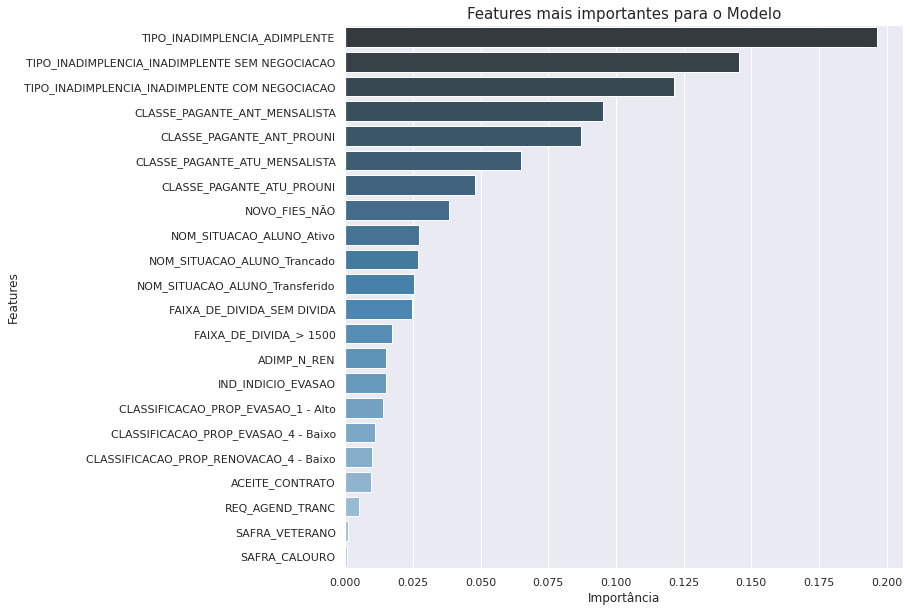

In [ ]:
fig, axs = plt.subplots(figsize=(10, 10), ncols=1)
plot = sns.barplot(x=df_feature_importance['Feature importance'], y=features, ax=axs, palette="Blues_d")

plot.set_title('Features mais importantes para o Modelo', size=15)
plot.set_xlabel('Importância')
plot.set_ylabel('Features')

# Exportar o gráfico, substitua o caminho pelo seu caminho de preferência
#fig.savefig('/content/drive/My Drive/TCC/Graficos/FeatureImportance.png')

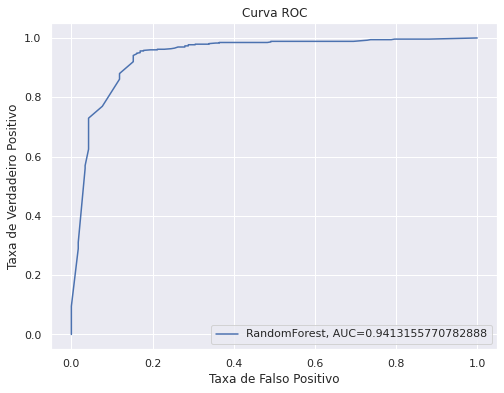

In [ ]:
fpr, tpr, _ = roc_curve(y_test_ohe, y_proba)
auc = roc_auc_score(y_test_ohe, y_proba)

plt.plot(fpr, tpr,  label="RandomForest, AUC="+str(auc))
plt.title('Curva ROC')
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.legend()
plt.show()

# Exportar o gráfico, substitua o caminho pelo seu caminho de preferência
#plt.savefig('/content/drive/My Drive/TCC/Graficos/ROCCurve.png')

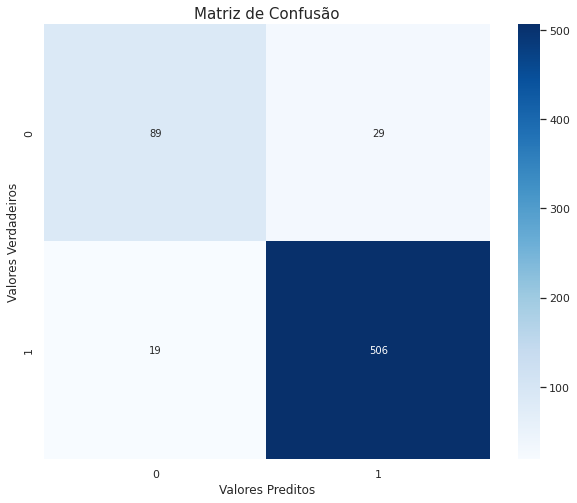

In [ ]:
fig, axs = plt.subplots(figsize=(10, 8), ncols=1)
cm = confusion_matrix(y_test_ohe, p)
plot = sns.heatmap(cm, annot = True, ax = axs, fmt='g', cmap='Blues');

plot.set_xlabel('Valores Preditos');
plot.set_ylabel('Valores Verdadeiros'); 
plot.set_title('Matriz de Confusão', size=15); 
plot.xaxis.set_ticklabels(['0', '1']); 
plot.yaxis.set_ticklabels(['0', '1']);

# Exportar o gráfico, substitua o caminho pelo seu caminho de preferência
#fig.savefig('/content/drive/My Drive/TCC/Graficos/ConfusionMatrix.png')

In [ ]:
# Imprimindo a Matriz de Confusão
print(confusion_matrix(y_test_ohe, p))

# Imprimindo a Precision e Recall
print(classification_report(y_test_ohe, p, digits=6))

[[ 89  29]
 [ 19 506]]
              precision    recall  f1-score   support

           0   0.824074  0.754237  0.787611       118
           1   0.945794  0.963810  0.954717       525

    accuracy                       0.925350       643
   macro avg   0.884934  0.859023  0.871164       643
weighted avg   0.923457  0.925350  0.924050       643



### Criando o nosso modelo final

Como já mencionado, usarei modelo [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) para a criação do nosso modelo de machine learning,  com os seguintes hiper parâmetros:

* Método de Tunning = **Bayesian Optimization**
 * AUC = *0.9412*
 * n_estimators = *72*
 * max_depth = *198*
 * min_samples_leaf = *1*	
 * min_samples_split =	*9*
 * bootstrap = *False*
 * max_features = *sqrt*
 * encoder = *OneHotEncoder*

Analisando o resultado das métricas em nosso DataFrame, escolhi as seguintes:

* Método de Seleção de Feature (SelectFromModel) = **LogisticRegression**
* Método de Encoder para as variáveis categórica = **OneHotEncoder**
* Número de Features = **22**

A métrica AUC se mostrou mais estável entre 12 e 22 features como mostrei no gráfico na etapa de seleção de features.



In [ ]:
# Código para a criação do modelo final
k = 22
selector_model = LogisticRegression(random_state=123, n_jobs=-1)  
selector = SelectFromModel(selector_model, max_features=k, threshold=-np.inf)

selector.fit(X_train_ohe, y_train_ohe)

X_train2 = selector.transform(X_train_ohe)
X_test2 = selector.transform(X_test_ohe)

mdl = RandomForestClassifier(n_estimators=72, max_depth=198, min_samples_leaf=1, min_samples_split=9, bootstrap=False, max_features = 'sqrt', random_state=1234, n_jobs=-1)
mdl.fit(X_train2, y_train_ohe)

p = mdl.predict(X_test2)
y_proba = mdl.predict_proba(X_test2)[:, 1]
 
acc = accuracy_score(y_test_ohe, p)
auc = roc_auc_score(y_test_ohe, y_proba)
recall = recall_score(y_test_ohe, p)
precision = precision_score(y_test_ohe, p)
f1 = f1_score(y_test_ohe, p)

mask = selector.get_support()
features = X_train_ohe.columns[mask]

mdl

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=198, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=72, n_jobs=-1,
                       oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

In [ ]:
# Resultado final do modelo final
cols   = ['Model', 'Accuracy', 'AUC', 'Recall', 'Prec.', 'F1', 'Encoder']
values = ['Random Forest Classifier', acc, auc, recall, precision, f1, 'OneHotEncoder']
metrics_final = pd.DataFrame({tup[0]: [tup[1]] for tup in zip(cols, values)})
metrics_final

,Model,Accuracy,AUC,Recall,Prec.,F1,Encoder
0,Random Forest Classifier,0.92535,0.941316,0.96381,0.945794,0.954717,OneHotEncoder


In [ ]:
# Modelo Preliminar
metrics_pre_ohe

,Model,Accuracy,AUC,Recall,Prec.,F1,Encoder
0,Random Forest Classifier,0.92535,0.932865,0.96,0.949153,0.954545,OneHotEncoder


In [ ]:
# Métricas dos modelos 
metrics_final['Object'] = 'Modelo Final'
metrics_pre_ohe['Object'] = 'Modelo Inicial'
df_model_final = pd.concat([metrics_final, metrics_pre_ohe], axis=0)
df_model_final

,Model,Accuracy,AUC,Recall,Prec.,F1,Encoder,Object
0,Random Forest Classifier,0.92535,0.941316,0.96381,0.945794,0.954717,OneHotEncoder,Modelo Final
0,Random Forest Classifier,0.92535,0.932865,0.96000,0.949153,0.954545,OneHotEncoder,Modelo Inicial


### Salvando nosso modelo para o disco

Depois de nosso modelo treinado e criado, vamos realizar a persistência no disco para podermos consumi-lo futuramente por nossa aplicação. Para isso usaremos o biblioteca [joblib](https://scikit-learn.org/stable/modules/model_persistence.html).

Referência: https://scikit-learn.org/stable/modules/model_persistence.html

In [ ]:
# Importando o pacote necessário
import joblib as jb

In [ ]:
jb.dump(mdl, root_path + 'modelrematricula_skl.pkl')

['drive/My Drive/TCC/modelrematricula_skl.pkl']

### Plotando as Árvores de Decisão (Decison Trees) de nossa Floresta Aleatória (Random Forest)


A interpretação humana pode ser muito custosa dependendo da profundidade da árvore e de seu número de features, que é o caso do nosso modelo. De qualquer forma os arquivos podem ser salvos no disco para uma consulta posterior.

In [23]:
# Importando os pacotes necessários
from sklearn.tree import export_graphviz
from glob import glob
import PIL
import pydotplus
from IPython.display import display, Image

Apenas para efeitos didáticos, reduzi o número de features (k) do modelo  abaixo. Dessa forma poderemos visualizar melhor o plot da árvore de decisão.

In [24]:
# Código para a criação do modelo final
k = 8
selector_model = LogisticRegression(random_state=123, n_jobs=-1)  
selector = SelectFromModel(selector_model, max_features=k, threshold=-np.inf)

selector.fit(X_train_ohe, y_train_ohe)

X_train2 = selector.transform(X_train_ohe)
X_test2 = selector.transform(X_test_ohe)

mdl = RandomForestClassifier(n_estimators=72, max_depth=198, min_samples_leaf=1, min_samples_split=9, bootstrap=False, max_features = 'sqrt', random_state=1234, n_jobs=-1)
mdl.fit(X_train2, y_train_ohe)

p = mdl.predict(X_test2)
y_proba = mdl.predict_proba(X_test2)[:, 1]
 
acc = accuracy_score(y_test_ohe, p)
auc = roc_auc_score(y_test_ohe, y_proba)
recall = recall_score(y_test_ohe, p)
precision = precision_score(y_test_ohe, p)
f1 = f1_score(y_test_ohe, p)

mask = selector.get_support()
features = X_train_ohe.columns[mask]

mdl

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=198, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=72, n_jobs=-1,
                       oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

Função para salvar no disco (Google Drive) cada árvore de decisão conforme sua profundidade 

In [32]:
#  Não esqueça de trocar o caminho abaixo para o seu de preferência
path = root_path + 'Trees/'

def save_decision_trees_as_png(clf, iteration, feature_name, target_name):
    file_name = "remat_" + str(iteration+1) + ".png"
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=feature_name,
        class_names=target_name,
        rounded=True,
        proportion=False,
        precision=2,
        filled=True,
    )
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_png(path + file_name)
    print("Árvore de Decisão {} salva no formato png".format(iteration + 1))

In [33]:
# Configurando os parâmatros feature_names e class_names da função
fn =  list(zip(mdl.feature_importances_, df_renovacao_ohe.columns))
cn = ['Não renovado', 'Renovado']

In [ ]:
# Código para salvar TODAS as árvores da Random Forest
#for i in range(len(mdl.estimators_)):
#    save_decision_trees_as_png(mdl.estimators_[i], i, fn, cn)

Como a profundidade desse modelo é de 72 (n_estimators), para efeitos didáticos vamos mudar para 5.

In [34]:
# Salvando apenas 5 árvores da Random Forest
for i in range(5):
    save_decision_trees_as_png(mdl.estimators_[i], i, fn, cn)

Árvore de Decisão 1 salva no formato png
Árvore de Decisão 2 salva no formato png
Árvore de Decisão 3 salva no formato png
Árvore de Decisão 4 salva no formato png
Árvore de Decisão 5 salva no formato png




Mostrar todas as árvores levaria muito tempo e poderíamos comprometer nosso ambiente de desenvolvimento, por isso vamos mostrar no notebook apenas 1(uma) árvore de decisão.


In [47]:
images = [ PIL.Image.open(f) for f in glob(path + 'remat_2.png') ]

# Código para mostrar TODAS as árvores geradas/utilizadas pelo nosso modelo (não aconselhado)
#images = [ PIL.Image.open(f) for f in glob(path + '*.png') ]

O aprendizado de máquina ainda sofre de um problema de caixa preta, e uma imagem não vai resolver o problema! No entanto, olhar para uma árvore de decisão individual nos mostra que este modelo (uma floresta aleatória) não é um método inexplicável, mas uma sequência de perguntas e respostas lógicas - da mesma forma que formaríamos ao fazer previsões. 

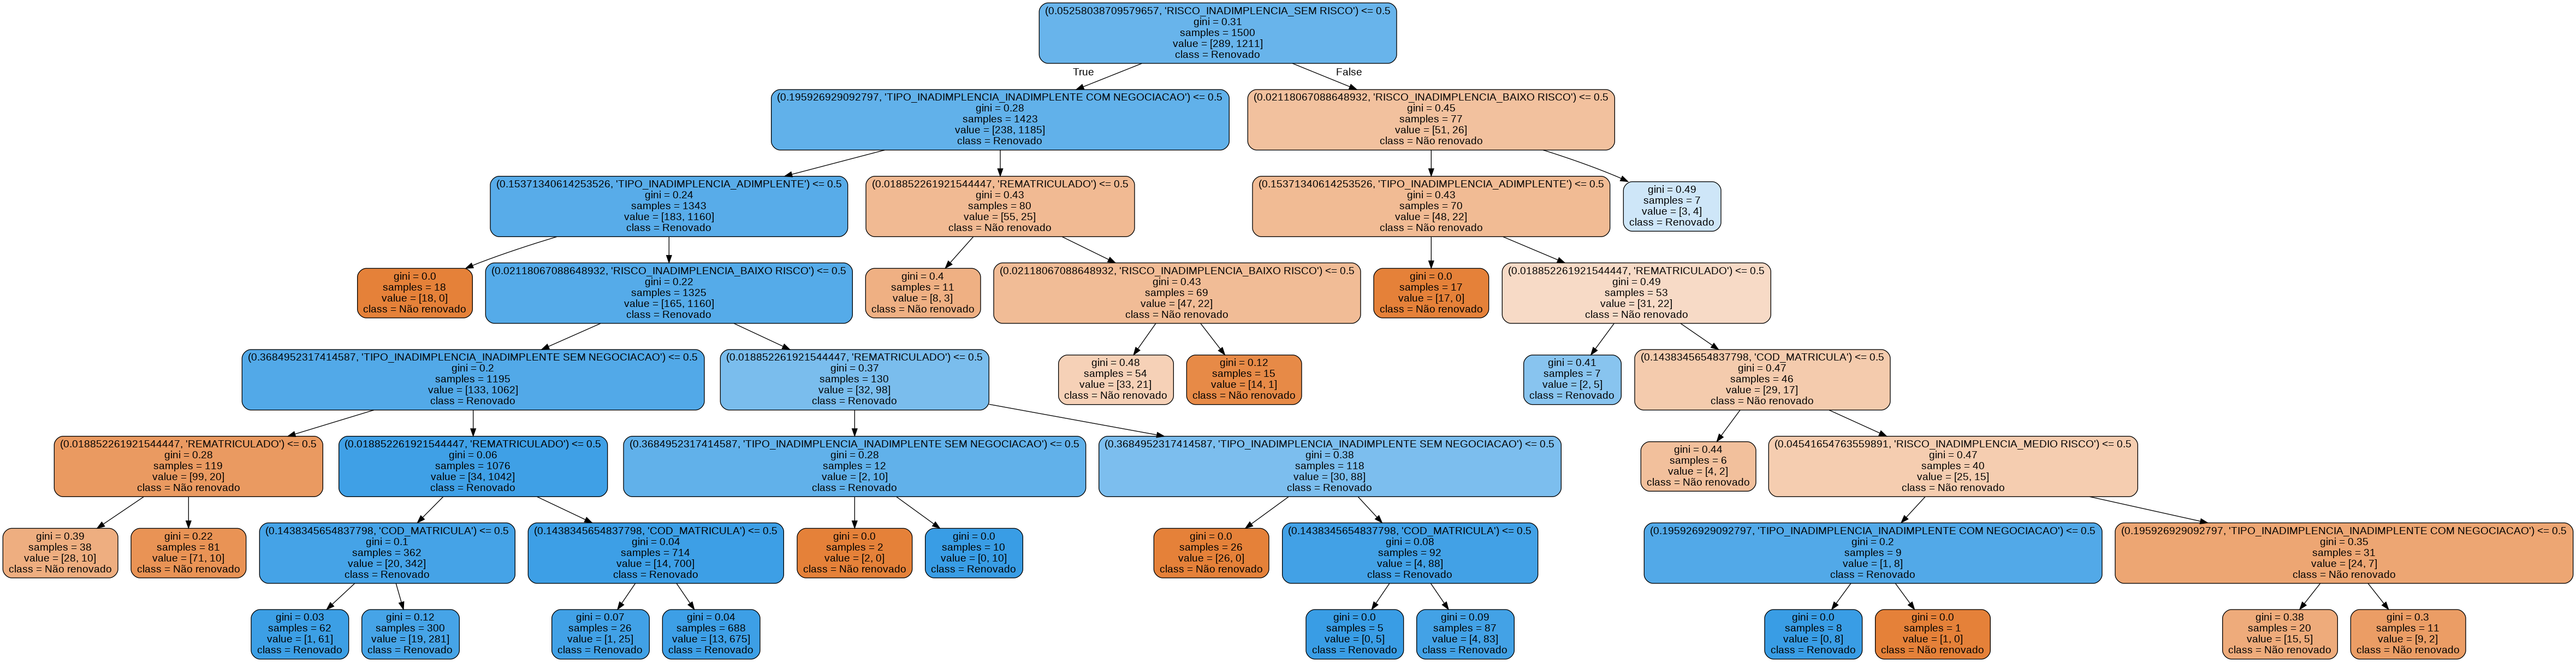

In [48]:
for im in images:
    display(Image(filename=im.filename, retina=True))